## Döntési fák
A projekt teljes futtatásához szükség van a dtreeviz telepítésére.
Anaconda Powershell Prompt --> "pip install dtreeviz"

In [1]:
!pip install dtreeviz
!pip install pydotplus

  Obtaining dependency information for dtreeviz from https://files.pythonhosted.org/packages/b3/e8/44eb59345d8ba9d2f6610df6441d63082f46021c1685de24716c22f55383/dtreeviz-2.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=4ff5528da335d0d6354eb2313ce6233ed85131df62c2877bb3283c968a654d15
  Stored in directory: /home/daniel/.cache/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [2]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn import tree

from dtreeviz.trees import *
import dtreeviz

import matplotlib.pyplot as plt

import pydotplus # conda install pydotplus

import warnings
warnings.filterwarnings('ignore')

cm = 'viridis' # a diagramok színei globális változó

### Adatok ábrázolásához segéd metódus: ponthálóvá alakítás

In [3]:
def get_grid(data):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

### Modell ábrázolásához segéd metódus

In [4]:
def scatter_grid(features, clf_tree):
    xx, yy = get_grid(x_train[features])
    predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    le = preprocessing.LabelEncoder()
    
    for i in range(len(predicted)):
        predicted[i] = le.fit_transform(predicted[i])
    
    predicted = predicted.astype(np.float64)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.pcolormesh(xx, yy, predicted, cmap=cm)
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=le.fit_transform(y_train), s=100, 
                cmap=cm, edgecolors='black', linewidth=1.5);

### A döntési fa ábrázolásához metódus

In [5]:
def tree_graph_to_png(dtree, feature_names, figs, fonts):
    plt.figure(figsize=figs)
    tree.plot_tree(dtree, filled=True, rounded=True, feature_names = feature_names, fontsize=fonts)
    plt.show()

### Adatok beolvasása

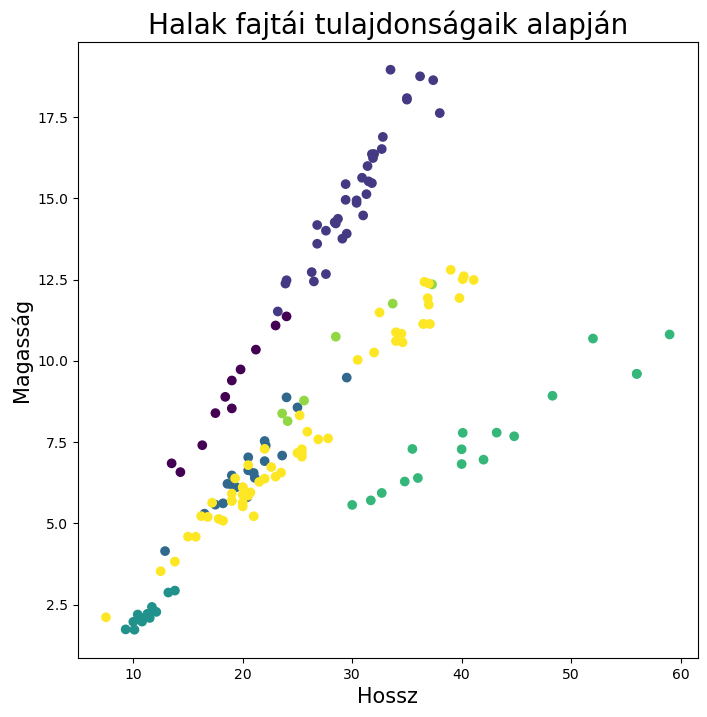

In [6]:
df = pd.read_csv('halak.csv', header=0, sep=';', encoding='ISO-8859-2')

X = df[['Hossz1', 'Magassag']] # Független változók
Y = df['Faj'] # Célváltozó

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

le = preprocessing.LabelEncoder() # Címkekódoló a fajták számmal való reprezentálásához

plt.figure(figsize=(8,8))
plt.title("Halak fajtái tulajdonságaik alapján", size=20)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=le.fit_transform(Y), cmap=cm)
plt.xlabel("Hossz", size=15)
plt.ylabel("Magasság", size=15)
plt.show()

### Döntési fa modell tanítása

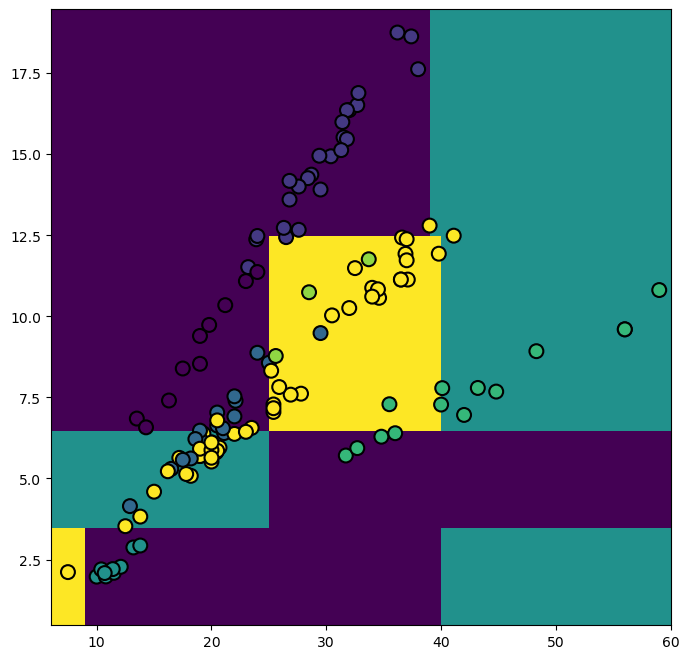

In [7]:
clf_tree_2var = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

clf_tree_2var.fit(x_train, y_train)

scatter_grid(['Hossz1','Magassag'], clf_tree_2var)

### Kép generálása a modellből és mentés .png-ként

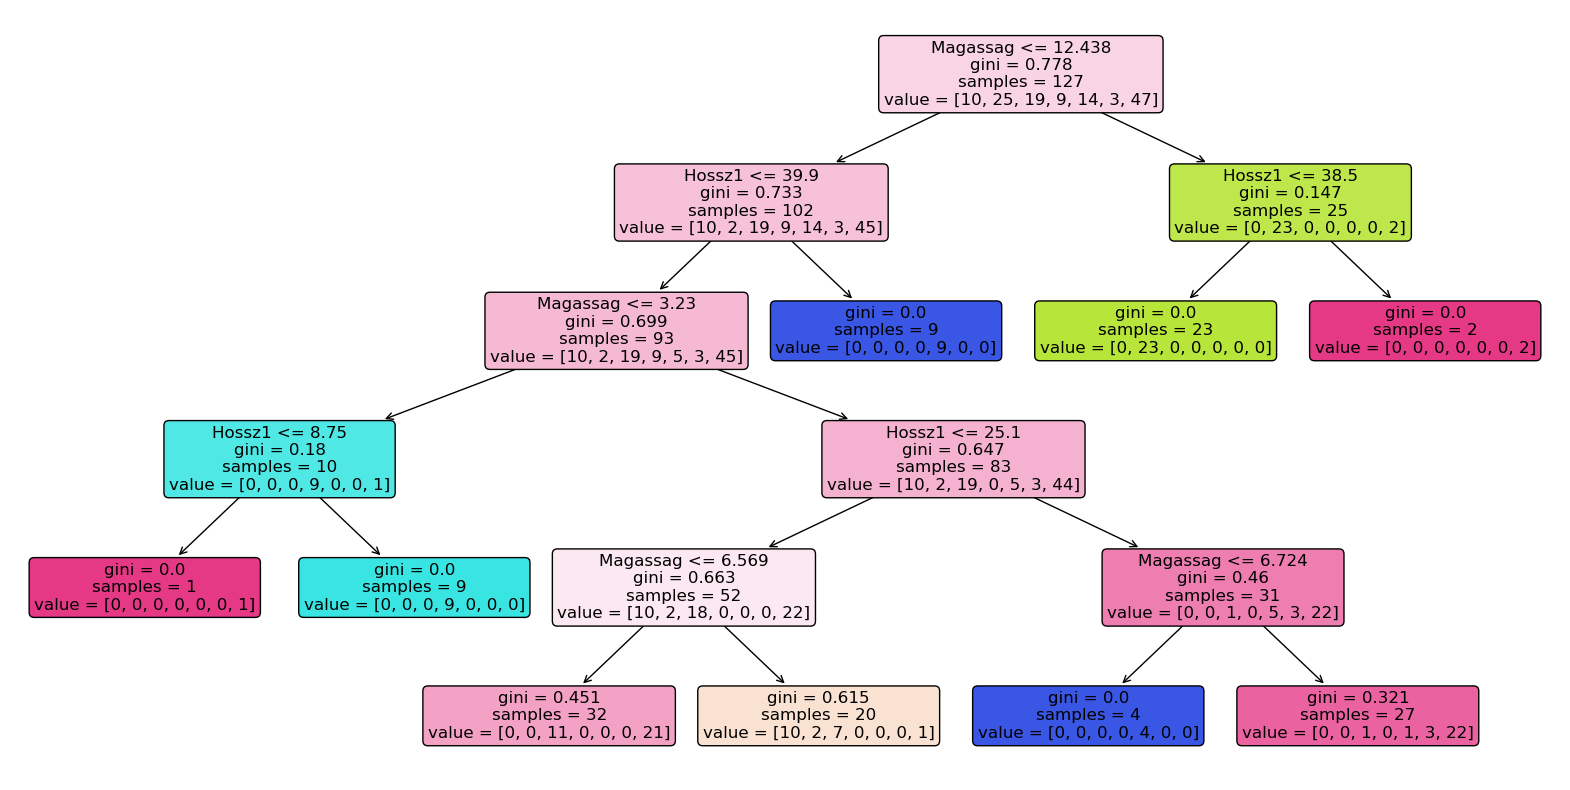

In [10]:
tree_graph_to_png(dtree=clf_tree_2var, feature_names=list(x_train.columns), figs=(20,10), fonts=12)

### Modell vizualizálása másképpen 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

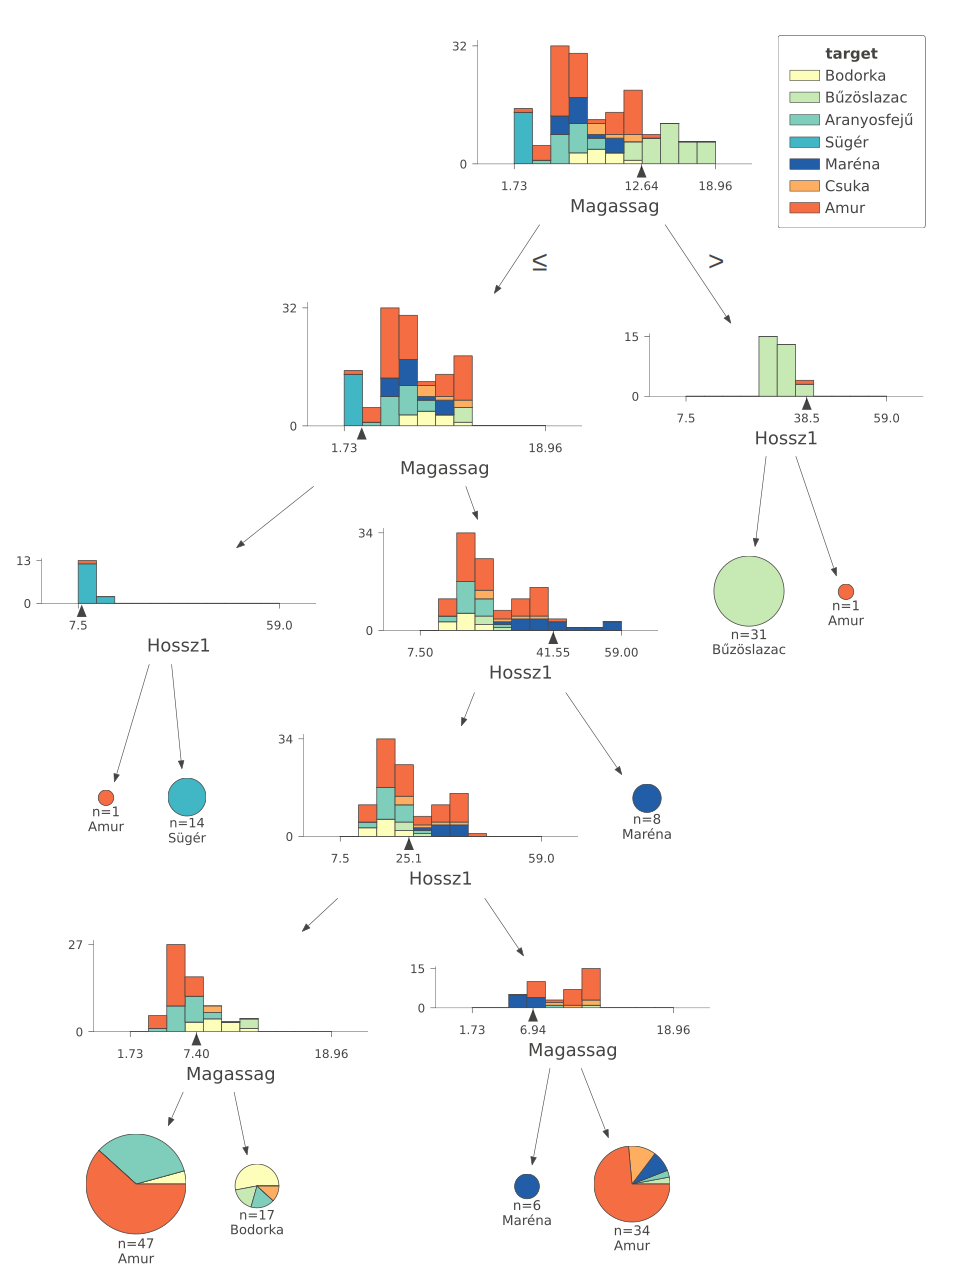

In [11]:
Xa = np.array(X)

le = preprocessing.LabelEncoder()
y_le = le.fit_transform(Y)

clfx = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

clfx.fit(Xa, y_le)

viz = dtreeviz.model(clfx, Xa, y_le, target_name="target", feature_names=list(X.columns), class_names=list(set(Y)))

viz.view(scale=2)

### Predikció

In [12]:
y_pred = clf_tree_2var.predict(x_val)

# Egy egyszerű DataFrame a célváltozó értékeinek megtekintésére az egyes kísérletekben
df_pred = pd.DataFrame({'original': y_val, 
                       'predicted': y_pred})

df_pred['match'] = [1 if x==y else 0 for x,y in zip(df_pred['original'], df_pred['predicted'])]

print("Accuracy: ", accuracy_score(y_val, y_pred))
df_pred.reset_index().drop('index', axis=1, inplace=False)

Accuracy:  0.78125


,original,predicted,match
0,Sügér,Sügér,1
1,Bűzöslazac,Bűzöslazac,1
2,Csuka,Csuka,1
3,Maréna,Amur,0
4,Sügér,Sügér,1
5,Aranyosfejű,Aranyosfejű,1
6,Bűzöslazac,Bűzöslazac,1
7,Bodorka,Amur,0
8,Sügér,Amur,0
9,Csuka,Csuka,1


### Mégegy próba, több változóval
Ezúttal próbáljuk meg az összes rendelkezésre álló változót felvenni a predikcióba, és nézzük meg, pontosabb lesz-e!

In [13]:
varlst = ['Suly', 'Hossz1', 'Hossz2', 'Hossz3', 'Magassag', 'Szelesseg']

X = df[varlst] # Független változók
Y = df['Faj'] # Célváltozó

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

clf_tree_multivar = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

clf_tree_multivar.fit(x_train, y_train)

y_pred_tree = clf_tree_multivar.predict(x_val)

df_pred['tree_pred'] = y_pred_tree

df_pred['tree_match'] = [1 if x==y else 0 for x,y in zip(df_pred['original'], 
                                                         df_pred['tree_pred'])]

print("Accuracy:", accuracy_score(y_val, y_pred_tree))

Accuracy: 0.8125


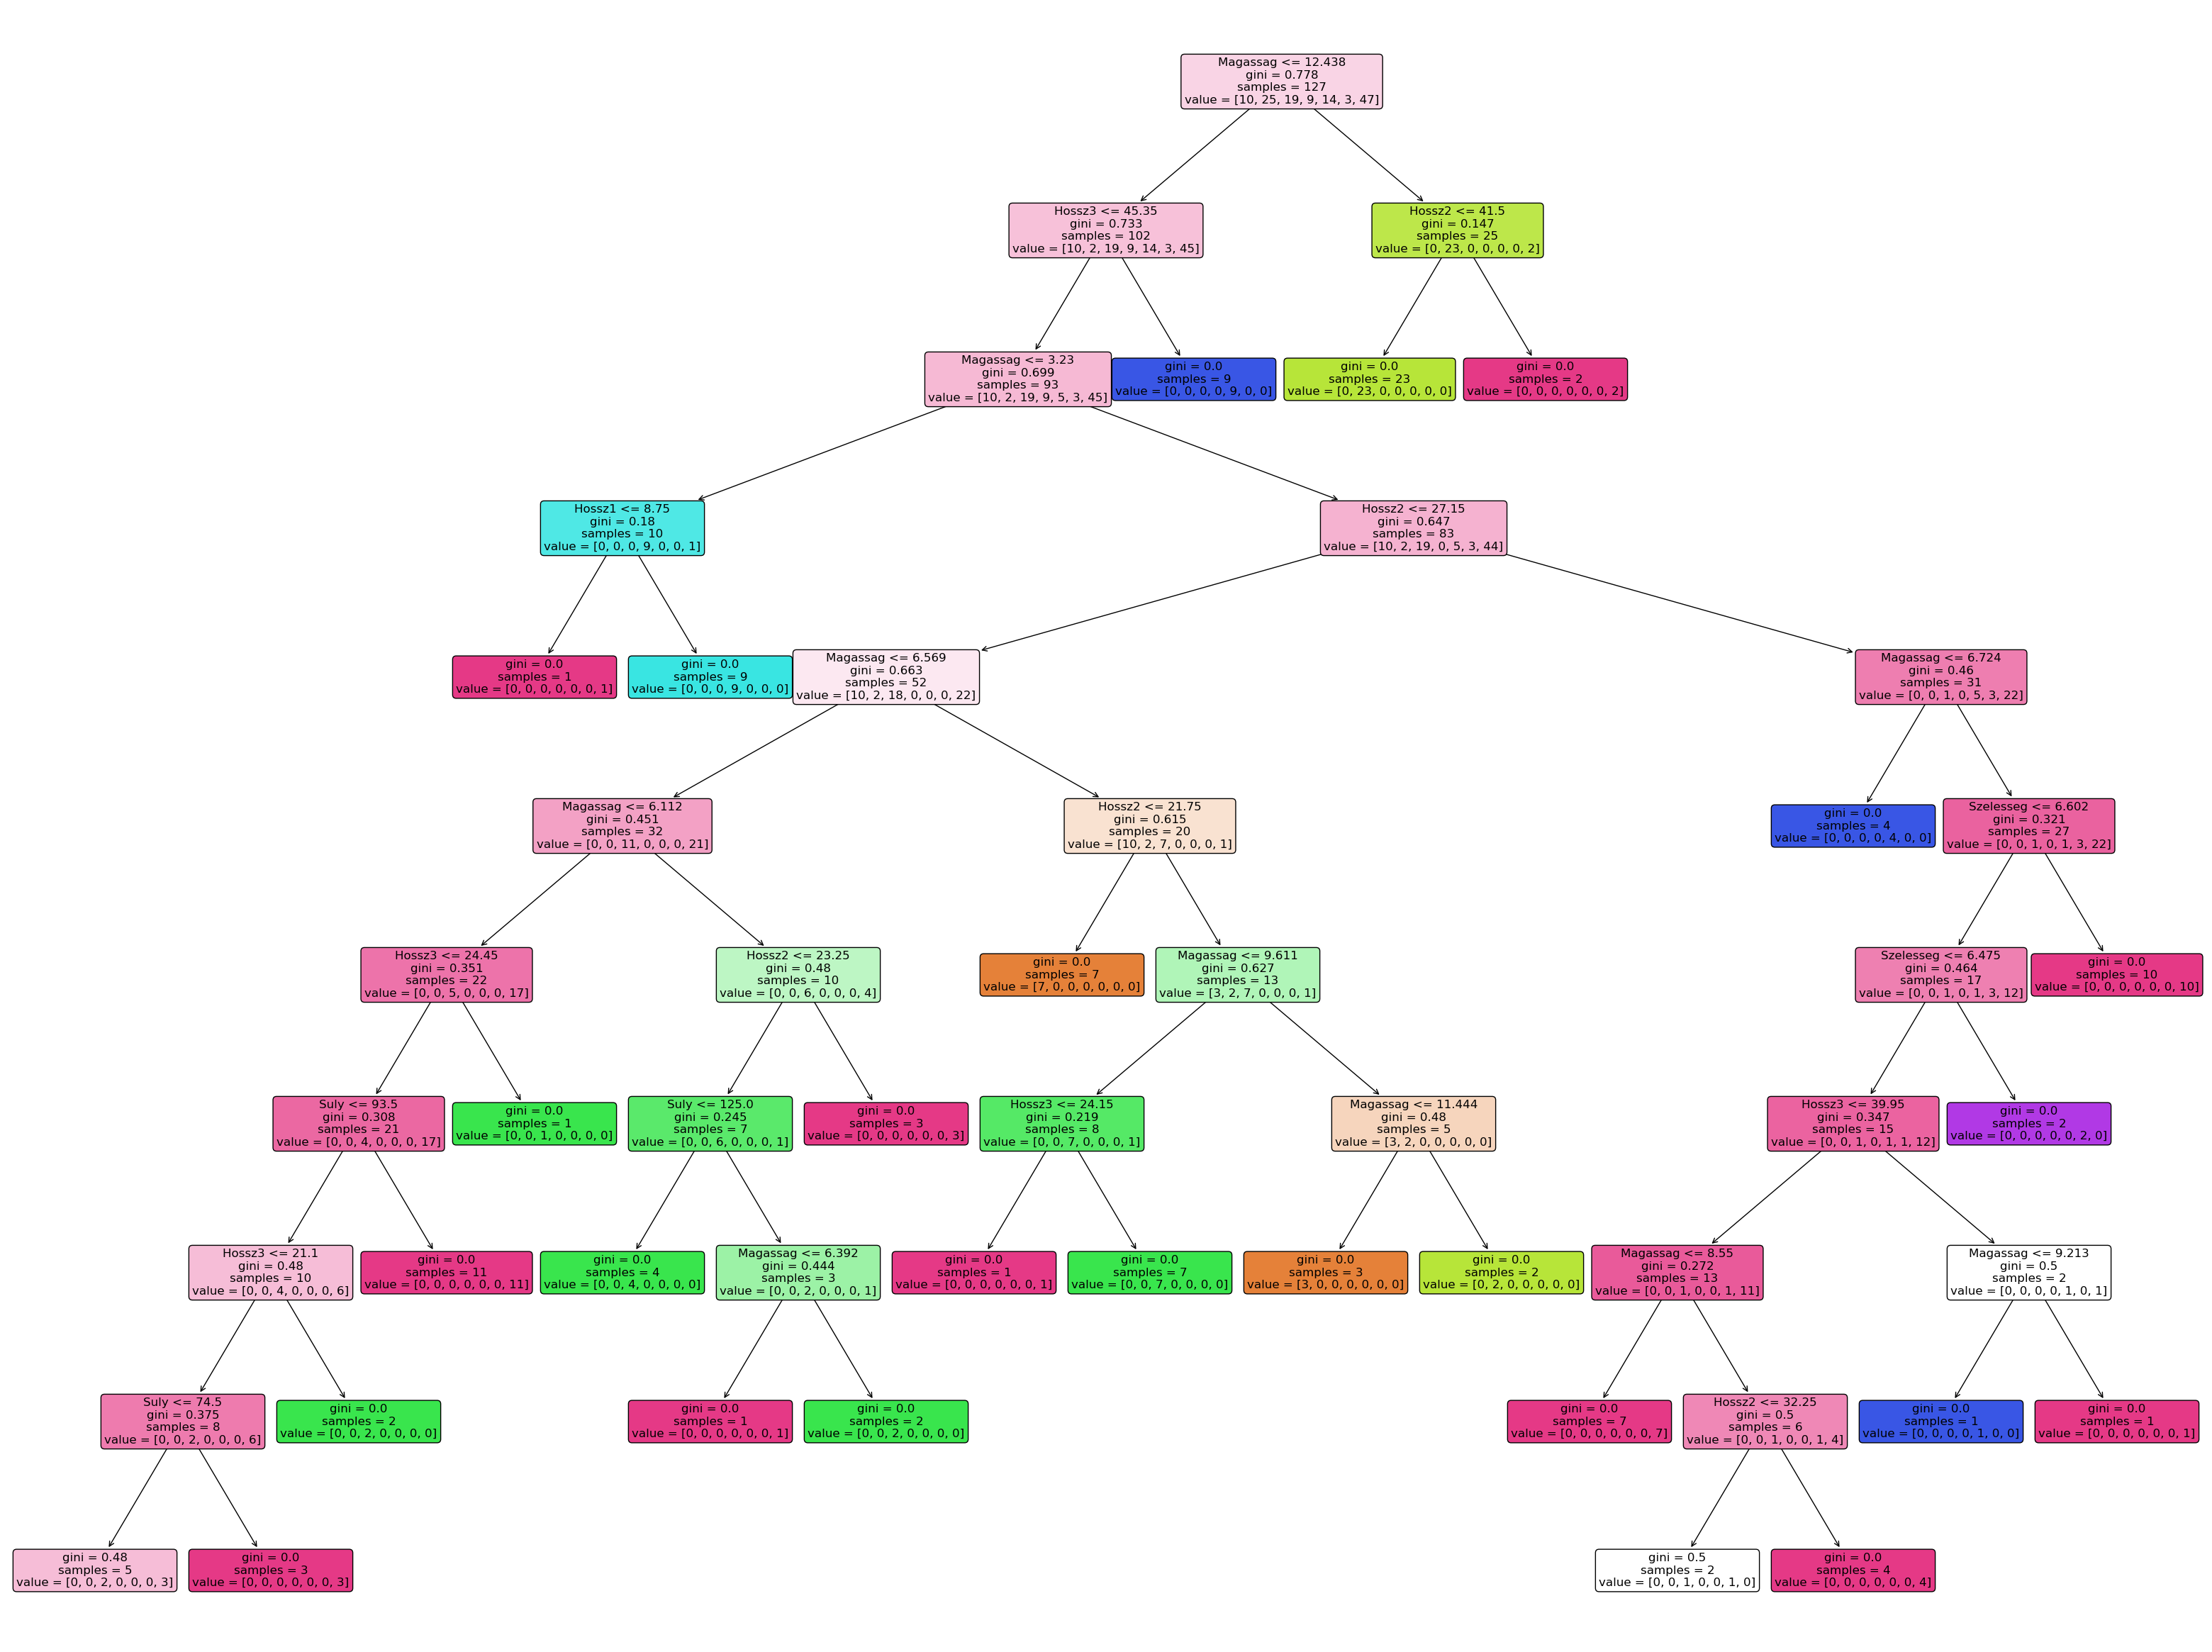

In [14]:
tree_graph_to_png(dtree=clf_tree_multivar, feature_names=varlst, figs=(40,30), fonts=12)

In [15]:
df_pred

,original,predicted,match,tree_pred,tree_match
78,Sügér,Sügér,1,Sügér,1
155,Bűzöslazac,Bűzöslazac,1,Bűzöslazac,1
128,Csuka,Csuka,1,Csuka,1
55,Maréna,Amur,0,Bodorka,0
94,Sügér,Sügér,1,Bodorka,0
29,Aranyosfejű,Aranyosfejű,1,Aranyosfejű,1
147,Bűzöslazac,Bűzöslazac,1,Bűzöslazac,1
51,Bodorka,Amur,0,Bodorka,1
98,Sügér,Amur,0,Bodorka,0
141,Csuka,Csuka,1,Csuka,1
